## Final Project: Decision Tree Algorithm
- Name: Jeffrey Hunt
- Project Name: Final Project Implementing Decision Trees
- Date: 11-27-22

## Problem Statement
Using the Decision Tree Algorithm and the car evaluation dataset from the UCI machine learning repository, are we able to predict the safety of future cars? We will also perform another Machine Learning algorithm on this data which is the KNN (K-Nearest Neighbor)algorithm. We can use the KNN algorithm to split different cars safety into different Categories. This is an important question to ask because we want to make sure that we producing the safest cars out onto the road. This may be a simple implementation of the algorithm and it is uses but it can be used as a very powerful tool in machine learning. 

## Decision Tree Algorithm
The Decision Tree Algorithm is one of the most commonly used algorithms in machine learning. The decision tree covers both classification and regression. In decision analysis, it can be used to visually represent decisions and decisions making. It is widely used in machine learning to derive a strategy to reach a particular goal. To consider how it looks like a tree we can take a basic example. Lets say we have data for whether a passenger would have survived the titanic or not. We can use a decision tree of different statements like if they were male or female, if the male was above or under the age of 10. All of these different decisions will lead us to determine if the person will survive the titanic or not.

## K Nearest Neighbors
The KNN algorithm is another algorithm that is very commonly used in machine learning. The KNN algorithm is a supervised machine learning algorithm that relies on labeled input data to learn a function that gives us an appropiate output when given new unlabed data. An example of this algorithm is that we want a child to learn what a pig looks like. So what we will do is we show the kid several different pictures some are pigs and others are of other things. When we show a pig we shout pig and when it is not a pig we shout no pig and after a while when we ask the kid if it is a pig or not they will able to figure it out. We can use this algorithm in our dataset to categorize different cars and there safety.  

## Algorthmic Foundations
1. Import the Data
2. PreProcess the Data (Exploratory Data Analysis, rename columns, check for NA values, etc)
3. Split the Data into Training and Testing sets
4. Encode the Data 
5. Build the Model using the Decision Tree Library
6. Train the Model 
7. Predict the Model
8. Visualize the Decision Tree
9. Conclusion (confusion Matrix, accuracy, Plots)
10. Repeat the Same steps again but use the KNN Algorithm this time to complete the data.

### Load Libraries

In [35]:
## Load the different libraries that we need
## Make sure to PIP install all necessary Packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz 
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import math

%matplotlib inline

### Data Exploration
- The dataset contains 3 concepts and 7 categories.
- The 3 concepts contain: Price, Tech, and Comfort.
- Price Categories:
    - Price: overall Price
    - Maint: Price of matience for the car
- Tech:
    - Techincal Charactersitics
- Comfort:
    - doors: Number of doors
    - Capcity: Number of persons who can sit in the car
    - lug_boot: Size of the luggage boot
    - safety: Estimated safety of the car. 
- All 7 variables in the dataset are categorical.


In [20]:
# Load in the data
data_df = pd.read_csv("car_evaluation.csv", header=None)

#data_df.head()

# The columns do not have names so we need to rename the columns
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

data_df.columns = col_names

#Exploratory Data Analysis
data_df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Preprocess the Data
- We need to encode our data because all of the data is categorical. This means that we need to change the data to show numerical values.
- Normalized: The goal of normalization is we want to chagne the values of a numeric columns in dataset so that we are able to use a common scale. 
- Standardized: The goal of standardization is rescale so that the fit of the distribution fits between 0 and 1 using mean and standard deviation as the base point to find specific values.

For the purposes of this assignment the data just needs to be encoded, normally when we encode data we also have to normalize it but for this data set we have all of the same number of elements and there are no big outliers.

The Dataset does not contain any NA values so we do not have to worry about cleaning the data.

In [24]:
## encode the Data
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])

data_df = encoder.fit_transform(data_df)

data_df.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1723,4,4,4,3,2,2,4
1724,4,4,4,3,2,3,3
1725,4,4,4,3,3,1,1
1726,4,4,4,3,3,2,4
1727,4,4,4,3,3,3,3


In [25]:
## Check to see if the Data set contains any NA values.
data_df.isnull().sum()

#There is no Missing values in the dataset so we can continue.

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Split the Dataset into training and testing sets
    - We need to split our dataset into training and testing sets so we are able to predict the safety of each car.
    - The first thing that we need to do is split the data into Dependent and Independent Variables.
    - Our Independent Variable is the Class variable and the Dependent Variables are all other Variables in the Dataset.

In [26]:
# Split are code into both training and testing sets
# X set is Dependenent - We drop the Class Dataset and keep everything else
# Y set is Independent - This is the Class dataset

X = data_df.drop(['class'], axis = 1)

Y = data_df['class']

X.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

Y_train.head()


48      1
468     1
155     1
1721    4
1208    1
Name: class, dtype: int32

## Implement the Decision Tree Model
Lets talk about the intution and variables before we begin implementing the decision Tree. The basic intution of the Decision tree is as follows:

1. For every attribnute in the decision tree the algorithm forms a node. The most significant attribute is formed as the root node.

2. We then work our way down the tree following the nodes that meets the condition (decision) that we have set for it meet.

3. We continue this process until we reach a leaf node, which contains the outcome of the decision tree.

How does the Algorithm Work?

- In the decision Tree algorithm we have to use something called Attribute Selections.What we are doing in attribute selection is we try decide what should be the root node at each level. We will use the two most common methods for decidng this when running our alogirthm, Entropy and Gini Index.

- Entropy: or also known as impurity in a given dataset. Information gain is the decrease in entropy. What information gain does is computes the difference between entropy entropy before split and after split of the dataset. Then the attribute with the highest information gain is chosen as the spltting attribute at the Node.

-Gini Index: Gini Index is the other attribute selection method that the Decision Tree uses. The gini index says that we if randomly select two items from a population they must have the same class. IT works best with categorical variables and performs only on binary splits. The attribute with the minimum Gini index is chosen as the splitting attribute. 
 

In [27]:
# Perform the Decision Tree Classifier with the gini index

clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

#Fit the Model
clf_gini.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [28]:
#Next we can predict the test Results with the gini index
y_pred_gini = clf_gini.predict(X_test)

# Check what the accuracy of our Gini Index is
test_accuracy = accuracy_score(Y_test, y_pred_gini)

print(f"The Model accuracy of the gini index is {test_accuracy}")

#For context of what this means y-test is the true labels and y_pred_gini are the predicted labels

The Model accuracy of the gini index is 0.8021015761821366


### Check for OverFitting and Underfitting
Overfitting: Means that our model makes not accurate predictions. Normally it means the train error is small but the test error is large.

Underfitting: This means that our model makes accurate but incorrect predictions. Here the train and test error are both large.

In [29]:
## See what the train and set set accuracy is
y_pred_train = clf_gini.predict(X_train)

train_accuracy = accuracy_score(Y_train, y_pred_train)

print(f"The train set accuracy is {train_accuracy}")
print(f"The test set accuracy is {test_accuracy}")


#From the accuracy of both the train and test set we can see that neither overfitting
# or underfitting exists

The train set accuracy is 0.7865168539325843
The test set accuracy is 0.8021015761821366


## Vizualize the Decision Tree 
We can use the sklearn tree package to vizualize how the algorithm makes it decisions on where to go.

[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [813, 255, 40, 49]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [386, 0, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\ngini = 0.577\nsamples = 771\nvalue = [427, 255, 40, 49]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [246, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [181, 255, 40, 49]'),
 Text(0.5, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [147, 124, 0, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [34, 131, 40, 49]')]

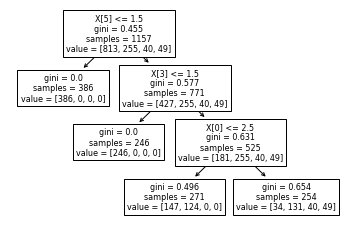

In [30]:

tree.plot_tree(clf_gini.fit(X_train, Y_train))
 

## Decision Tree Using Entropy

In [31]:
## Do it the same thing again but this time use Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=0)


clf_entropy.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [32]:
## predict the test set results
y_pred_entropy = clf_entropy.predict(X_test)

entropy_accuracy = accuracy_score(Y_test, y_pred_entropy)

print(f"The accuracy of the entropy score is {entropy_accuracy}")

#As we can see the accuracy of the score is the same as from above


The accuracy of the entropy score is 0.8021015761821366


In [33]:
## Check for over and underfitting
y_pred_train = clf_entropy.predict(X_train)

train_accuracy = accuracy_score(Y_train, y_pred_train)

print(f"The train set accuracy is {train_accuracy}")
print(f"The test set accuracy is {test_accuracy}")

# As we can see it is the same as before so it does not exist


The train set accuracy is 0.7865168539325843
The test set accuracy is 0.8021015761821366


## Vizualize Entropy Decision Tree
We can see that both the entropy and Gini models used the same decisions to get to the final answer.

[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [813, 255, 40, 49]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [386, 0, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\ngini = 0.577\nsamples = 771\nvalue = [427, 255, 40, 49]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [246, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [181, 255, 40, 49]'),
 Text(0.5, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [147, 124, 0, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [34, 131, 40, 49]')]

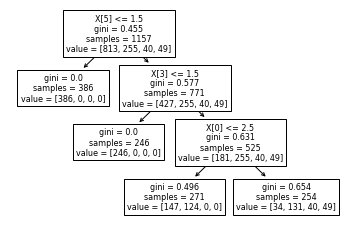

In [14]:
tree.plot_tree(clf_gini.fit(X_train, Y_train))

## Conclusion Decision Tree Algorithm
In Conclusion the decision tree algorithm using the crerion of the gini index and entropy does a good job of predicting the safety of a car with an 80% accuracy. In both the gini index and the entropy we get that the training and testing datasets both showed us the same accuracy. We can say that this happens because of such a small dataset.

# Implementation of KNN algorithm
For the Final Project I wanted to try and run two algorithms. The second of these algorithms is the K Nearest Neighbor algorithm. We can use the K Nearest Algorithm to see where different vehicles are being clusted together based on there safety. The first thing that we need to do is find the optimal number of K. First we will just choose a random value for K, then we will loop through multiple numbers and see the accuracy for what the optimal K will be.

In [47]:
# We should be able to use the same test set as before and begin working the algorithm

# X_train, Y_train, X_test, Y_test
## We can determine the best K value by giving it a certain number of values in an array
# then seeing the accuracy of the test.

# K value = 5
k = 5

model = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)

pred_y = model.predict(X_test)

train_accuracy = accuracy_score(Y_test, pred_y)

print("Accuracy of the Model where k=5 is", train_accuracy)

# So we see that with a K value = 5 we get an accuracy of 92% which is really good.

# We can still see what other K vlaues would give us.

Accuracy of the Model where k=5 is 0.8966725043782837


The optimzed K value for the model is 6
The High accuracy of the model is at 0.9299474605954466


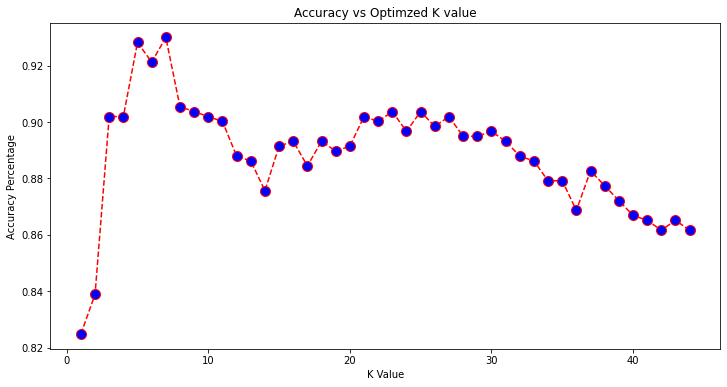

In [46]:
# Plot the accuracy of different K values

acc = []

#Check what the best K value would be from 1 - 45
for k in range(1, 45):
    model = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
    m = model.predict(X_test)
    acc.append(accuracy_score(Y_test, m))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 45), acc, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('Accuracy vs Optimzed K value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Percentage')

#print the index of the highest value in accuracy and that will give us the optimzed K value
print(f"The optimzed K value for the model is {acc.index(max(acc))}")
print(f"The High accuracy of the model is at {max(acc)}")


## Accuracy and Optimzed K
So from running the K value for various different numbers of K we are able to get that the best value for K is 6 with an accuracy of around 92%. So our intial guess of using the K value of 5 was a good choice for K.

## Conclusion of KNN Algorithm
Using the KNN algorithm we are able to classify different cars and there safety based off of certain characteristics. When running the algorithm we saw that the optimzed value of K is 6 which means it classifies it based off of the 6 closest vlaues to itself. We were able to choose K by graphing the values of the accuracy based on K and this gave us the best possible K value. The accuracy of the model stands around 92$, so we are able to group a car safety based on certain characteristics 92% of the time. The reason for such a high accuracy on all of the different K values we could use would possible be because we are using such a small dataset to run the algorithm. Also upon reading some different articles about the KNN algorithm the way we found the K value is not normally how we find it in the industry, but we are able to find it this way because we are using a smaller dataset. In conlusion these were both very fun algorithms to run and I learned a lot more mathamtical principles in developing these two algorithms.

## References
https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set
https://archive.ics.uci.edu/ml/datasets/car+evaluation
https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html
https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
https://scikit-learn.org/stable/modules/tree.html
https://realpython.com/knn-python/
https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/
https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/ 